# Importing datasets 

In [1]:
import pandas as pd
import model_evaluation_utils as meu
df = pd.read_csv('corona_tested_individuals_subset_ver_00184.csv')
print(df)

         test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
0       2022-03-03      0      0            0                    0          0   
1       2022-03-03      0      0            0                    0          0   
2       2022-03-03      0      0            0                    0          0   
3       2022-03-03      0      0            0                    0          0   
4       2022-03-03      0      0            0                    0          0   
5       2022-03-03      0      0            0                    0          0   
6       2022-03-03      0      0            0                    0          0   
7       2022-03-03      1      1            1                    0          1   
8       2022-03-03      1      1            0                    0          0   
9       2022-03-03      0      0            0                    0          0   
10      2022-03-03      0      0            0                    0          0   
11      2022-03-03      0   

# Data Preprocessing

C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


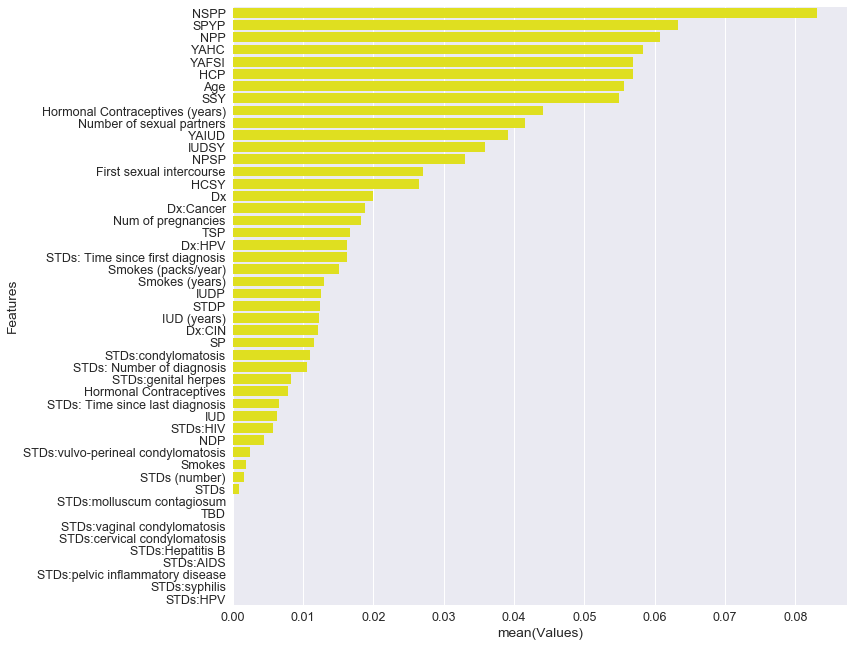

In [48]:
from sklearn.ensemble import RandomForestClassifier

X_p = df5.drop('Biopsy', axis =1)
Y_p = df5["Biopsy"]
names = X_p.columns
rf = RandomForestClassifier()
rf.fit(X_p, Y_p)

result_rf = pd.DataFrame()
result_rf['Features'] = X_p.columns
result_rf ['Values'] = rf.feature_importances_
result_rf.sort_values('Values',inplace=True, ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_rf, color="Yellow")
plt.show()

C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


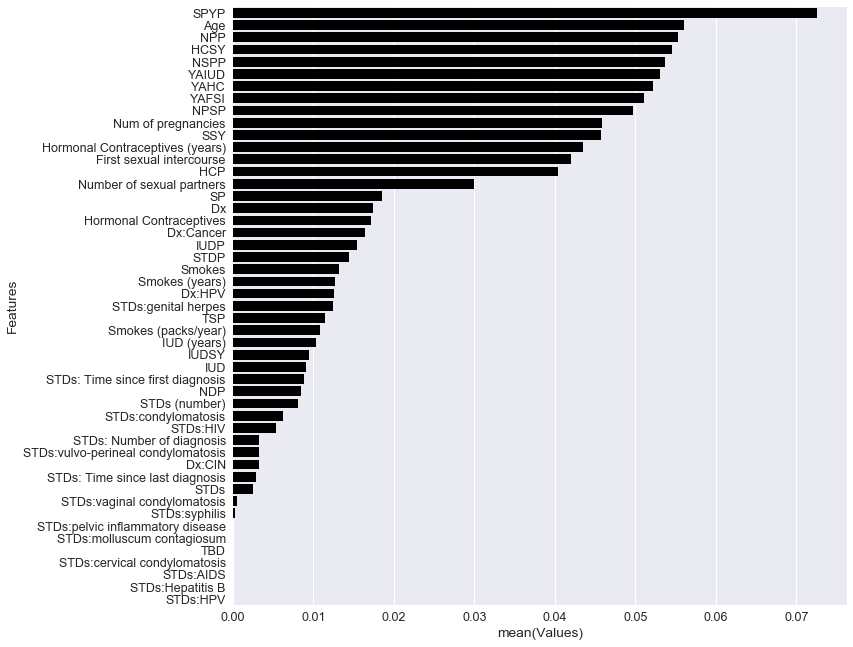

In [49]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_p, Y_p)

result_et = pd.DataFrame()
result_et['Features'] = X_p.columns
result_et ['Values'] = model.feature_importances_
result_et.sort_values('Values',inplace =True,ascending=False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Values',y = 'Features', data=result_et, color="black")
plt.show()

C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


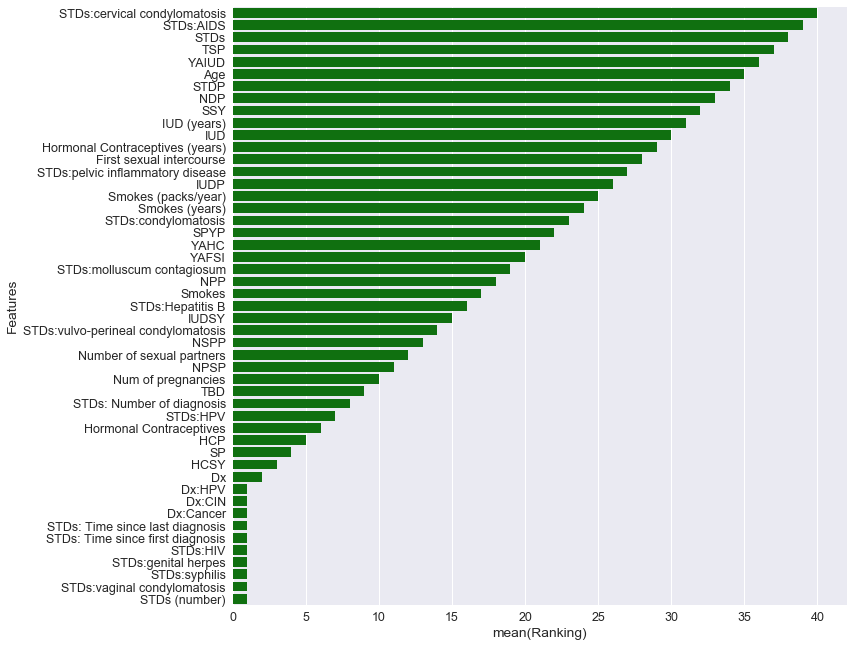

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X_p, Y_p)

result_lg = pd.DataFrame()
result_lg['Features'] = X_p.columns
result_lg ['Ranking'] = rfe.ranking_
result_lg.sort_values('Ranking', inplace=True ,ascending = False)

plt.figure(figsize=(11,11))
sns.set_color_codes("pastel")
sns.barplot(x = 'Ranking',y = 'Features', data=result_lg, color="green")
plt.show()

In [51]:
df_cancer = pd.read_csv('cervical_cancer.csv')
df_cancer = df_cancer.replace('?', np.nan)
# df_cancer = df_cancer.drop(DROP_COLUMNS, axis = 1)
df_cancer = df_cancer.rename(columns={'Biopsy': 'Cancer'})
df_cancer = df_cancer.apply(pd.to_numeric)
df_cancer = df_cancer.fillna(df_cancer.mean().to_dict())

X = df_cancer.drop('Cancer', axis=1)
y = df_cancer['Cancer']

df_cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Cancer
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,6.140845,5.816901,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0


# Citology Algos

## KNN

In [52]:
X1 = df_cancer.loc[:, 'Age' : 'Schiller']
Y1 = df_cancer.loc[:,'Citology']

In [53]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=42)

In [54]:
knnprediction1 = knn1.predict(X1_test)
print(knnprediction1)

NameError: name 'knn1' is not defined

In [55]:
knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, knnprediction1))

In [185]:
print("{} knn Score: {:.2f}%".format(2, knn1.score(X1_test, y1_test)*100))

2 knn Score: 96.74%


In [186]:
features = ["Age","Number of sexual partners","First sexual intercourse","Num of pregnancies","Smokes","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","STDs: Time since first diagnosis","STDs: Time since last diagnosis","Dx:Cancer","Dx:CIN","Dx:HPV","Dx"]
training_features = df_cancer[features]

In [187]:
label = ["Hinselmann","Schiller","Citology","Cancer"]
outcome_features = df_cancer[label]

In [188]:
num_features = ["Age","Number of sexual partners","First sexual intercourse","Num of pregnancies","Hormonal Contraceptives","Hormonal Contraceptives (years)","STDs: Time since first diagnosis","STDs: Time since last diagnosis"]
cat_features = ["Smokes","Smokes (years)","Smokes (packs/year)", "IUD","Dx:Cancer","Dx:CIN","Dx:HPV","Dx"]

In [189]:
label = ["Hinselmann", "Schiller", "Citology", "Cancer"]
outcome_features = df_cancer[label]

In [190]:
training_features = pd.get_dummies(training_features, columns=cat_features)

In [191]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(training_features[num_features])

C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [192]:
cat_eng_features = list(set(training_features.columns) - set(num_features))

In [193]:
model=knn1.fit(X1_train, y1_train)
from sklearn.externals import joblib
import os
if not os.path.exists("Mode4"):
    os.mkdir("Mode4")
if not os.path.exists("Scale4"):
    os.mkdir("Scale4")

In [194]:
joblib.dump(model, r'Mode4/model4.pickle')
joblib.dump(ss, r'Scale4/scalar4.pickle')

C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes(

['Scale4/scalar4.pickle']

In [195]:
model = joblib.load('Mode/model.pickle')
scaler = joblib.load('Scale/scalar2.pickle')

In [196]:
new_data = pd.DataFrame([{"Age":"22","Number of sexual partners":"2","First sexual intercourse":"2","Num of pregnancies":"1","Smokes":"1","Smokes (years)":"1","Smokes (packs/year)":"1","Hormonal Contraceptives":"1","Hormonal Contraceptives (years)":"1","IUD":"1","STDs: Time since first diagnosis":"1","STDs: Time since last diagnosis":"1","Dx:Cancer":"1","Dx:CIN":"1","Dx:HPV":"1","Dx":"1"},{"Age":"22","Number of sexual partners":"2","First sexual intercourse":"2","Num of pregnancies":"1","Smokes":"1","Smokes (years)":"1","Smokes (packs/year)":"1","Hormonal Contraceptives":"1","Hormonal Contraceptives (years)":"1","IUD":"1","STDs: Time since first diagnosis":"1","STDs: Time since last diagnosis":"1","Dx:Cancer":"1","Dx:CIN":"1","Dx:HPV":"1","Dx":"1"},{"Age":"22","Number of sexual partners":"2","First sexual intercourse":"2","Num of pregnancies":"1","Smokes":"1","Smokes (years)":"1","Smokes (packs/year)":"1","Hormonal Contraceptives":"1","Hormonal Contraceptives (years)":"1","IUD":"1","STDs: Time since first diagnosis":"1","STDs: Time since last diagnosis":"1","Dx:Cancer":"1","Dx:CIN":"1","Dx:HPV":"1","Dx":"1"}])
new_data = new_data[["Age","Number of sexual partners","First sexual intercourse","Num of pregnancies","Smokes","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","STDs: Time since first diagnosis","STDs: Time since last diagnosis","Dx:Cancer","Dx:CIN","Dx:HPV","Dx"]]

In [197]:
outcome_name = ["Cancer"]
outcome_labels = df_cancer[outcome_name]

In [198]:
prediction_features = new_data[features]
prediction_features[num_features] = ss.transform(prediction_features[num_features])
prediction_features = pd.get_dummies(prediction_features, columns=cat_features)

C:\Users\Ali  Nawaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


In [199]:
current_categorical_engineered_features = set(prediction_features.columns) - set(num_features)
missing_features = set(cat_eng_features) - current_categorical_engineered_features
for feature in missing_features:
    prediction_features[feature] = [0] * len(prediction_features) 

In [200]:
predictions = model.predict(new_data)
new_data["Hinselmann", "Schiller", "Citology", "Cancer"] = predictions
new_data

ValueError: operands could not be broadcast together with shapes (3,16) (13,) 

## Decision Tree

In [56]:
tree1 = DecisionTreeClassifier(max_leaf_nodes=3,random_state=0)
tree1.fit(X1_train, y1_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [57]:
Treeprediction1 = tree1.predict(X1_test)
print(Treeprediction1)

NameError: name 'tree1' is not defined

In [ ]:
print("{} DT Score: {:.2f}%".format(2, tree1.score(X1_test, y1_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, Treeprediction1))

## NB 

In [146]:
NB1 = GaussianNB()
NB1.fit(X1_train, y1_train)

NameError: name 'GaussianNB' is not defined

In [ ]:
NBprediction1 = NB1.predict(X1_test)
print(NBprediction1)

In [ ]:
print("{} NB Score: {:.2f}%".format(2, NB1.score(X1_test, y1_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, NBprediction1))

## Ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
rnd_clf1 = RandomForestClassifier(n_estimators=10, random_state=42)#The number of trees in the forest.
svm_clf1 = SVC(gamma="auto", random_state=42)
voting_clf1 = VotingClassifier(estimators=[('rf', rnd_clf1), ('NB', NB1)],voting='hard')#If ‘hard’, uses predicted class labels for majority rule voting instead of probability based
voting_clf1.fit(X1_train, y1_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf1 in (rnd_clf1, svm_clf1, voting_clf1):
    clf1.fit(X1_train, y1_train)
    voting1 = clf1.predict(X1_test)
    print(clf1.__class__.__name__, accuracy_score(y1_test, voting1))
    print(voting1)

In [ ]:
print("{} Voting clf Score: {:.2f}%".format(2, clf1.score(X1_test, y1_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, voting1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf1 = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, random_state=42)
rnd_clf1.fit(X1_train, y1_train)
y1_pred_rf = rnd_clf1.predict(X1_test)
np.sum(voting1 == y1_pred_rf) / len(voting1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred_rf ,target_names=["0", "1"]))

# Schiller

## KNN 

In [ ]:
X2 = df_cancer.loc[:, 'Age' : 'Hinselmann']
Y2 = df_cancer.loc[:,'Schiller']

In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, random_state=42)

In [56]:
knn2 = KNeighborsClassifier()
knn2.fit(X2_train, y2_train)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
knnprediction2 = knn2.predict(X2_test)
print(knnprediction2)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, knnprediction2))

In [ ]:
print("{} knn Score: {:.2f}%".format(2, knn2.score(X2_test, y2_test)*100))

## Decison Tree 

In [ ]:
tree2 = DecisionTreeClassifier(max_leaf_nodes=3,random_state=0)
tree2.fit(X2_train, y2_train)

In [ ]:
Treeprediction2 = tree2.predict(X2_test)
print(Treeprediction2)

In [ ]:
print("{} DT Score: {:.2f}%".format(2, tree2.score(X2_test, y2_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, Treeprediction2))

## Naive Bayes 

In [ ]:
NB2 = GaussianNB()
NB2.fit(X2_train, y2_train)

In [ ]:
print("{} NB Score: {:.2f}%".format(2, NB2.score(X2_test, y2_test)*100))

In [ ]:
NBprediction2 = NB2.predict(X2_test)
print(NBprediction2)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, NBprediction2))

## Ensemble 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)#The number of trees in the forest.
svm_clf2 = SVC(gamma="auto", random_state=42)
voting_clf2 = VotingClassifier(estimators=[('rf', rnd_clf2), ('NB', NB2)],voting='hard')#If ‘hard’, uses predicted class labels for majority rule voting instead of probability based
voting_clf2.fit(X2_train, y2_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf2 in (rnd_clf2, svm_clf2, voting_clf2):
    clf2.fit(X2_train, y2_train)
    voting2 = clf2.predict(X2_test)
    print(clf2.__class__.__name__, accuracy_score(y2_test, voting2))
    print(voting2)

In [ ]:
print("{} Voting clf Score: {:.2f}%".format(2, clf2.score(X2_test, y2_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, voting2))

In [ ]:
print("{} Random_Forest Score: {:.2f}%".format(2, rnd_clf2.score(X2_test, y2_test)*100))

# Hinselmann

In [ ]:
X3 = df_cancer.loc[:, 'Age' : 'Dx']
Y3 = df_cancer.loc[:,'Hinselmann']

In [ ]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, random_state=42)

## KNN 

In [ ]:
knn3 = KNeighborsClassifier()
knn3.fit(X3_train, y3_train)

In [ ]:
knnprediction3 = knn3.predict(X3_test)
print(knnprediction3)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y3_test, knnprediction3))

In [ ]:
print("{} knn Score: {:.2f}%".format(2, knn3.score(X3_test, y3_test)*100))

## Decision Tree

In [ ]:
tree3 = DecisionTreeClassifier(max_leaf_nodes=3,random_state=0)
tree3.fit(X3_train, y3_train)

In [ ]:
Treeprediction3 = tree3.predict(X3_test)
print(Treeprediction3)

In [ ]:
print("{} DT Score: {:.2f}%".format(2, tree3.score(X3_test, y3_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y3_test, Treeprediction3))

## Naive Bayes

In [ ]:
NB3 = GaussianNB()
NB3.fit(X3_train, y3_train)

In [ ]:
NBprediction3 = NB3.predict(X3_test)
print(NBprediction3)

In [ ]:
print("{} NB Score: {:.2f}%".format(2, NB3.score(X3_test, y3_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y3_test, NBprediction3))

## Ensemble 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
rnd_clf3 = RandomForestClassifier(n_estimators=10, random_state=42)#The number of trees in the forest.
svm_clf3 = SVC(gamma="auto", random_state=42)
voting_clf3 = VotingClassifier(estimators=[('rf', rnd_clf3), ('NB', NB3)],voting='hard')#If ‘hard’, uses predicted class labels for majority rule voting instead of probability based
voting_clf2.fit(X3_train, y3_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf3 in (rnd_clf3, svm_clf3, voting_clf3):
    clf3.fit(X3_train, y3_train)
    voting3 = clf3.predict(X3_test)
    print(clf3.__class__.__name__, accuracy_score(y3_test, voting3))
    print(voting3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf3 = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, random_state=42)
rnd_clf3.fit(X3_train, y3_train)
y_pred_rf3 = rnd_clf3.predict(X3_test)
np.sum(voting3 == y_pred_rf3) / len(voting3)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y3_test, voting3))

# Cancer

In [ ]:
X = df_cancer.drop('Cancer', axis=1)
y = df_cancer['Cancer']

In [ ]:
X = df_cancer.loc[:, 'Age' : 'Citology']
Y = df_cancer.loc[:,'Cancer']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# 1. KNN

In [57]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
knnprediction = knn.predict(X_test)
print(knnprediction)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knnprediction))

In [ ]:
print("{} knn Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knnprediction)
print("Confusion matrix:\n{}".format(confusion))

In [ ]:
meu.plot_model_roc_curve(knn, X_test, y_test)

# 2. Decision_Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(max_leaf_nodes=3,random_state=0)
tree.fit(X_train, y_train)

In [ ]:
Treeprediction = tree.predict(X_test)
print(Treeprediction)

In [ ]:
print("{} DT Score: {:.2f}%".format(2, tree.score(X_test, y_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Treeprediction))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, Treeprediction)
print("Confusion matrix:\n{}".format(confusion))

In [ ]:
meu.plot_model_roc_curve(tree, X_test, y_test)

# 3. Naive_Bayes

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
NB = GaussianNB()
NB.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
NBprediction = NB.predict(X_test)
print(NBprediction)

In [ ]:
print("{} NB Score: {:.2f}%".format(2, NB.score(X_test, y_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, NBprediction))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, NBprediction)
print("Confusion matrix:\n{}".format(confusion))

In [ ]:
meu.plot_model_roc_curve(NB, X_test, y_test)

# 4. Ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)#The number of trees in the forest.
svm_clf = SVC(gamma="auto", random_state=42)
voting_clf = VotingClassifier(estimators=[('rf', rnd_clf), ('NB', NB)],voting='hard')#If ‘hard’, uses predicted class labels for majority rule voting instead of probability based
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    voting = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, voting))
    print(voting)

In [ ]:
print("{} Voting clf Score: {:.2f}%".format(2, clf.score(X_test, y_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, voting))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
np.sum(voting == y_pred_rf) / len(voting)

In [ ]:
print("{} Random_Forest Score: {:.2f}%".format(2, rnd_clf.score(X_test, y_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf ,target_names=["0", "1"]))

In [ ]:
meu.plot_model_roc_curve(rnd_clf, X_test, y_test)

In [ ]:
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_full = pd.read_csv('cervical_cancer.csv')

In [ ]:
df_full.info()

In [ ]:
df_fullna = df_full.replace('?', np.nan)
df_fullna.isnull().sum() #check NaN counts in different columns
df = df_fullna

In [ ]:
df = df.convert_objects(convert_numeric=True) #turn data into numeric type for computation

In [ ]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0)
df['IUD (years)'] = df['IUD (years)'].fillna(0)
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [ ]:
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [ ]:
df.isnull().sum()

In [ ]:
df_data = df

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

In [ ]:
np.random.seed(42)
df_data_shuffle = df_data.iloc[np.random.permutation(len(df_data))]

df_train = df_data_shuffle.iloc[1:686, :]
df_test = df_data_shuffle.iloc[686: , :]

In [ ]:
df_train_feature = df_train[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

train_label = np.array(df_train['Biopsy'])

df_test_feature = df_test[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]

test_label = np.array(df_test['Biopsy'])

In [ ]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_feature = minmax_scale.fit_transform(df_train_feature)
test_feature = minmax_scale.fit_transform(df_test_feature)

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential() 

model.add(Dense(units=5000, 
                input_dim=46, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1500,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,
                kernel_initializer='uniform', 
                activation='sigmoid'))

print(model.summary())
model.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature, y=train_label,  
                          validation_split=0.2, epochs=20, 
                          batch_size=200, verbose=2) 

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model.evaluate(test_feature, test_label)
print('\n')
print('accuracy=',scores[1])

In [ ]:
prediction = model.predict_classes(test_feature)
df_ans = pd.DataFrame({'Biopsy' :test_label})
df_ans['Prediction'] = prediction

In [ ]:
df_ans

In [ ]:
df_ans[ df_ans['Biopsy'] != df_ans['Prediction'] ]

In [ ]:
df_ans['Prediction'].value_counts()

In [ ]:
df_ans['Biopsy'].value_counts()

In [ ]:
cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])
B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])

conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

In [ ]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

In [ ]:
c3 = df1[["Age", "Number of sexual partners","First sexual intercourse","Dx:Cancer","Num of pregnancies","Smokes","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs (number)","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","STDs: Time since first diagnosis","STDs: Time since last diagnosis","Dx:CIN","Dx:HPV","Dx","Hinselmann","Schiller","Citology","Biopsy"]]

In [ ]:
listMaxAmp = []
listMinAmp = []
listMean = []
listVar = []
listStdDev = []
listPercentile25 = []
listPercentile50 = []
listPercentile75 = []
listEnergy = []
listSkewness = []
listKurtosis = []
list3rdMoment = []
list4thMoment = []
listHojorh = []
listHurst = []
listPfd = []
listDfa = []
listFft = []
listBandPower = []
listDwt = []
yLabel = []

In [ ]:
import pandas as pd
import glob as gb
import mne as mn
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import svm
for i in range(18):
    
    for i in range(len(df1)):
        listMaxAmp.append(np.amax(c3))
    for i in range(len(c3)):
        listMinAmp.append(np.amin(c3))
    for i in range(len(c3)):
        listMean.append(np.mean(c3))
    for i in range(len(c3)):
        listVar.append(np.var(c3))
    for i in range(len(c3)):
        listStdDev.append(np.std(c3))
    for i in range(len(c3)):
        listPercentile25.append(np.percentile(c3,25))
    for i in range(len(c3)):
        listPercentile50.append(np.percentile(c3,50))
    for i in range(len(c3)):
        listPercentile75.append(np.percentile(c3,75))
    for i in range(len(c3)):
        listEnergy.append(np.square(np.sum(c3)))
    for i in range(len(c3)):
        listSkewness.append(skew(c3))
    for i in range(len(c3)):
        listKurtosis.append(kurtosis(c3))
    for i in range(len(c3)):
        list3rdMoment.append(stats.moment(c3, moment=3))
    for i in range(len(c3)):
        list4thMoment.append(stats.moment(c3, moment=4))
    Matrix = [listMaxAmp, listMinAmp, listMean, listVar, listStdDev, listPercentile25, listPercentile50, listPercentile75, listEnergy, listSkewness, listKurtosis, list3rdMoment, list4thMoment, listDfa, listPfd, listHojorh, listBandPower, listDwt]
columns = len(Matrix)
rows = len(Matrix[0])
convertedData = pd.DataFrame(Matrix)
convertedData = convertedData.T
print('Row', rows)
print('cols', columns)

In [ ]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

In [ ]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
%timeit -r2 -n10 missing_percentage(df) # setting the number of runs(-r) and/or loops (-n)

In [ ]:
missing_percentage(df)

In [ ]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [ ]:
percent_value_counts(df, 'Age')

In [ ]:
df.describe()

In [ ]:
survived_summary = df_cancer.groupby("Cancer")
survived_summary.mean().reset_index()

In [ ]:
male_mean = df_cancer[df_cancer['Number of sexual partners'] == 1].Cancer.mean()
print ("Male survival mean: " + str(male_mean))

# Cytology

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X1_train, y1_train)
y_pred_rf = rnd_clf.predict(X1_test)

In [ ]:
print("{} Random_Forest Score: {:.2f}%".format(2, rnd_clf.score(X1_test, y1_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf ,target_names=["0", "1"]))

# Schiller

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf2 = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, random_state=42)
rnd_clf2.fit(X2_train, y2_train)
y_pred_rf2 = rnd_clf2.predict(X2_test)

In [ ]:
print("{} Random_Forest Score: {:.2f}%".format(2, rnd_clf2.score(X2_test, y2_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, y_pred_rf2 ,target_names=["0", "1"]))

# Hinsalmann

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf3 = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, random_state=42)
rnd_clf3.fit(X3_train, y3_train)
y_pred_rf3 = rnd_clf3.predict(X3_test)

In [ ]:
print("{} Random_Forest Score: {:.2f}%".format(2, rnd_clf3.score(X3_test, y3_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y3_test, y_pred_rf3 ,target_names=["0", "1"]))

# Biopsy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf4 = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, random_state=42)
rnd_clf4.fit(X_train, y_train)
y_pred_rf4 = rnd_clf4.predict(X_test)

In [ ]:
print("{} Random_Forest Score: {:.2f}%".format(2, rnd_clf4.score(X_test, y_test)*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf3 ,target_names=["0", "1"]))